y = [ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -2.1987915e-02
 -2.4627686e-02 -2.6977539e-02]
len = 420500
sr = 84100


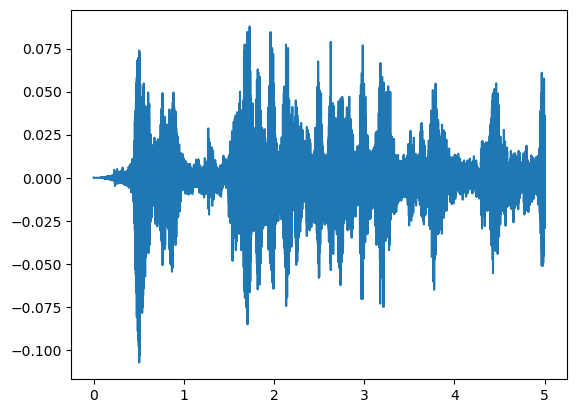

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

filename = "sound/recording0.wav"
y ,sr = librosa.load(filename ,sr = None)  # y = amplitude, sr = sampling rate

print(f"y = {y}")
print(f"len = {len(y)}")
print(f"sr = {sr}")

time = np.linspace(0,len(y)/sr ,len(y))

plt.plot(time,y)

plt.show()


In [3]:
import numpy as np
from scipy.io.wavfile import write

rate = sr
data = y[::-1]
scaled = np.int16(data / np.max(np.abs(data)) * 32767/4)
write('sound/test.wav', rate, scaled)


In [4]:
import numpy as np
import sounddevice as sd
# from scipy.io.wavfile import write

# fs = 44100
# data = np.random.uniform(-1, 1, fs)
fs = sr
data = y
print(data)
sd.play(data, fs)

[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ... -2.1987915e-02
 -2.4627686e-02 -2.6977539e-02]


[0.00000000e+00 1.38274336e-01 2.76548673e-01 ... 2.39997235e+04
 2.39998617e+04 2.40000000e+04]
[5.79648135e-01 1.15352636e+01 1.12913834e+01 ... 1.08979299e-03
 1.07971266e-03 1.09578939e-03]


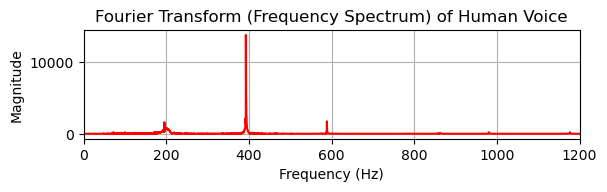

13775.518297550632
2.4095293660959745


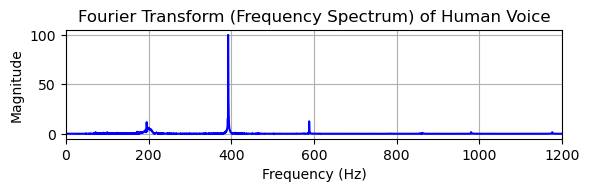

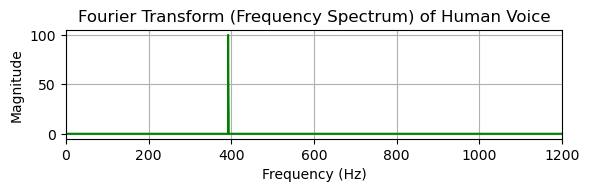

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the human voice audio file
filename = "Phone/stringG.mp3"  # Replace with your file
y, sr = librosa.load(filename, sr=None)

# Compute Fourier Transform using FFT
N = len(y)  # Number of samples
frequencies = np.fft.rfftfreq(N, d=1/sr)  # Frequency bins
fft_values = np.fft.rfft(y)  # Compute FFT
magnitude = np.abs(fft_values)  # Magnitude spectrum

print(frequencies)
print(magnitude)

# Plot the magnitude spectrum (Frequency Domain)
plt.subplot(3,1,1)
# plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude, color='r')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform (Frequency Spectrum) of Human Voice")
plt.xlim(0, 1200)  # Limit x-axis to 5 kHz (Human voice mostly < 5kHz)
plt.grid()
plt.show()

max_mag = max(magnitude)
avg_mag = sum(magnitude)/len(magnitude)

print(max_mag)
print(avg_mag)
new_mag = magnitude/max_mag*100

plt.subplot(3,1,2)
plt.plot(frequencies, new_mag, color='b')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform (Frequency Spectrum) of Human Voice")
plt.xlim(0, 1200)  # Limit x-axis to 5 kHz (Human voice mostly < 5kHz)
plt.grid()
plt.show()

fileter_mag = new_mag.copy()
fileter_mag[fileter_mag < 20] = 0

plt.subplot(3,1,3)
plt.plot(frequencies, fileter_mag, color='g')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform (Frequency Spectrum) of Human Voice")
plt.xlim(0, 1200)  # Limit x-axis to 5 kHz (Human voice mostly < 5kHz)
plt.grid()
plt.show()


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
def soud_to_frequency(filename,persent = 20):
    # filename = "Phone/stringE2.mp3"  # Replace with your file
    y, sr = librosa.load(filename, sr=None)
    N = len(y)  # Number of samples
    frequencies = np.fft.rfftfreq(N, d=1/sr)  # Frequency bins
    fft_values = np.fft.rfft(y)  # Compute FFT
    magnitude = np.abs(fft_values)  # Magnitude spectrum

    max_mag = max(magnitude)

    new_mag = magnitude/max_mag*100

    fileter_mag = new_mag.copy()
    fileter_mag[fileter_mag < persent] = 0

    ans = []
    for i in range(len(fileter_mag)):
        if fileter_mag[i]!=0:
            ans.append(int(frequencies[i]))
    ans = list(set(ans))
    ans.sort()
    return ans


In [ ]:
# print(soud_to_frequency("Phone/stringE.mp3"))
# print(soud_to_frequency("Phone/stringA.mp3"))
print(soud_to_frequency("Phone/stringD.mp3"))
# print(soud_to_frequency("Phone/stringG.mp3"))
# print(soud_to_frequency("Phone/stringB.mp3"))
# print(soud_to_frequency("Phone/stringE2.mp3"))

[98, 197, 198, 199, 297, 298, 299, 300]


In [ ]:
print(soud_to_frequency("Phone/stringD.mp3"))
print(soud_to_frequency("Dstring.mp3"))

[98, 197, 198, 199, 297, 298, 299, 300]
[26, 52, 53, 79]


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def show_sonud(filename,filter_persent = 20):
    # Load the human voice audio file

    y, sr = librosa.load(filename, sr=None)
    time = np.linspace(0,len(y)/sr ,len(y))

    # Compute Fourier Transform using FFT
    N = len(y)  # Number of samples
    frequencies = np.fft.rfftfreq(N, d=1/sr)  # Frequency bins
    fft_values = np.fft.rfft(y)  # Compute FFT
    magnitude = np.abs(fft_values)  # Magnitude spectrum

    print(frequencies)
    print(magnitude)

    plt.subplot(3,1,1)
    plt.plot(time,y)

    plt.title("Amplitude in time")
    plt.show()


    # Plot the magnitude spectrum (Frequency Domain)
    plt.subplot(3,1,2)
    # plt.figure(figsize=(10, 4))
    plt.plot(frequencies, magnitude, color='r')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Fourier Transform (Frequency Spectrum) of Human Voice")
    plt.xlim(0, 600)  # Limit x-axis to 5 kHz (Human voice mostly < 5kHz)
    plt.grid()
    plt.show()

    max_mag = max(magnitude)
    avg_mag = sum(magnitude)/len(magnitude)

    print(max_mag)
    print(avg_mag)
    new_mag = magnitude/max_mag*100

    # plt.subplot(3,1,2)
    # plt.plot(frequencies, new_mag, color='b')
    # plt.xlabel("Frequency (Hz)")
    # plt.ylabel("Magnitude")
    # plt.title("Fourier Transform (Frequency Spectrum) of Human Voice")
    # plt.xlim(0, 1200)  # Limit x-axis to 5 kHz (Human voice mostly < 5kHz)
    # plt.grid()
    # plt.show()

    fileter_mag = new_mag.copy()
    fileter_mag[fileter_mag < filter_persent] = 0

    plt.subplot(3,1,3)
    plt.plot(frequencies, fileter_mag, color='g')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Fourier Transform (Frequency Spectrum) of Human Voice")
    plt.xlim(0, 600)  # Limit x-axis to 5 kHz (Human voice mostly < 5kHz)
    plt.grid()
    plt.show()

    for i in range(len(fileter_mag)):
        if fileter_mag[i] >= filter_persent:
            print(frequencies[i])

[146, 147, 294, 295, 442]
[146, 147, 293, 294, 440, 441]
[0.00000000e+00 4.14897941e-02 8.29795882e-02 ... 2.20499170e+04
 2.20499585e+04 2.20500000e+04]
[1.01627256e+00 1.12624850e+00 5.59967384e-01 ... 1.02095923e-05
 1.22759574e-05 1.12186925e-05]


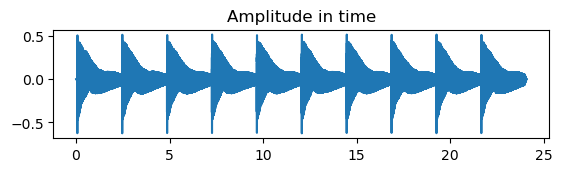

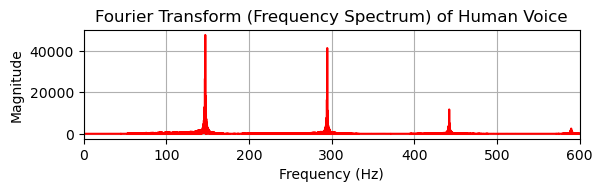

47669.27921191555
3.055161193494437


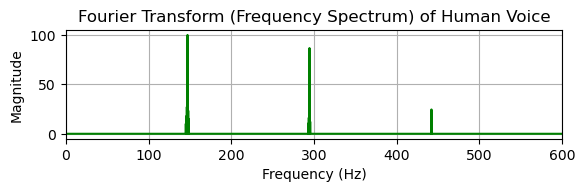

145.0483200867052
145.46321802745663
145.87811596820808
146.29301390895952
146.70791184971097
147.1228097904624
147.53770773121386
147.9526056719653
148.36750361271675
148.7824015534682
293.41582369942194
293.8307216401734
294.2456195809248
294.6605175216763
295.0754154624277
295.4903134031792
442.19822525289015
442.61312319364157
[0.00000000e+00 1.55730897e-01 3.11461794e-01 ... 2.39996885e+04
 2.39998443e+04 2.40000000e+04]
[8.92471169 2.74762747 1.17397324 ... 0.01270908 0.01271595 0.01271883]


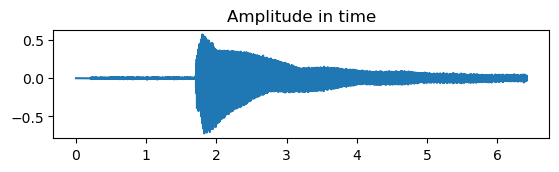

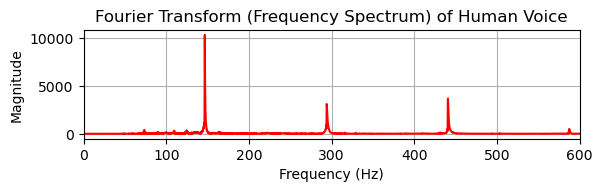

10300.287280127795
2.1137224867152504


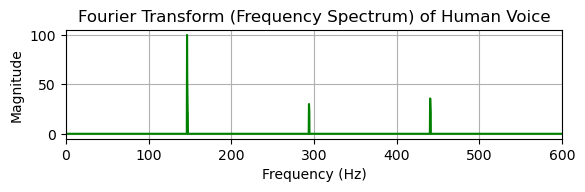

146.38704318936877
146.54277408637876
146.69850498338872
146.85423588039868
147.00996677740864
147.16569767441862
147.32142857142858
147.47715946843854
293.8642026578073
294.01993355481727
294.17566445182723
294.33139534883725
294.4871262458472
440.40697674418607
440.562707641196
440.718438538206
440.87416943521595
441.0299003322259
441.1856312292359
441.3413621262459


In [ ]:
print(soud_to_frequency("Dstring.mp3"))
print(soud_to_frequency("Phone/stringD.mp3"))
show_sonud("Dstring.mp3",10)
show_sonud("Phone/stringD.mp3")

[0.00000000e+00 1.29132231e-01 2.58264463e-01 ... 2.39997417e+04
 2.39998709e+04 2.40000000e+04]
[9.46484325e+00 4.42260405e+00 5.72977241e+00 ... 8.38035641e-03
 8.38959786e-03 8.38240241e-03]


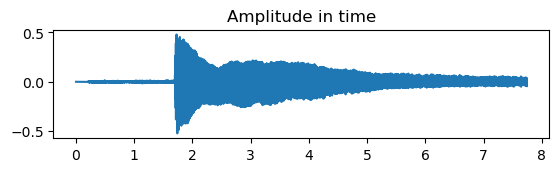

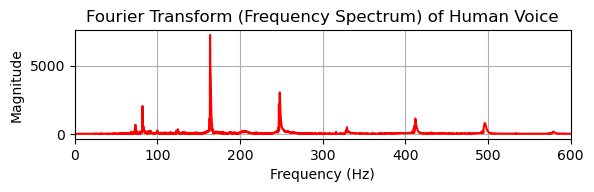

7247.533200125824
2.488624311433178


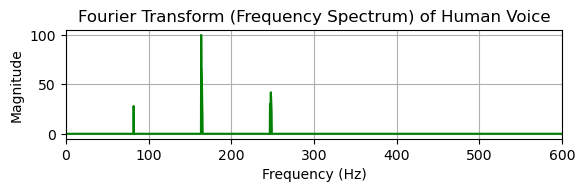

81.86983471074382
81.99896694214877
163.4814049586777
163.61053719008265
163.73966942148763
163.86880165289259
163.99793388429754
164.1270661157025
164.25619834710744
164.38533057851242
164.51446280991738
164.64359504132233
164.77272727272728
164.90185950413226
165.0309917355372
165.16012396694217
246.77169421487605
246.90082644628103
247.02995867768598
247.54648760330582
247.67561983471077
247.80475206611573
247.93388429752068
248.06301652892566
248.1921487603306
248.32128099173556
248.45041322314052
248.57954545454547
248.70867768595045
248.8378099173554
None


In [ ]:
print(show_sonud("Phone/stringE.mp3"))

[81, 162, 163, 164, 165, 245, 326, 327, 409, 410, 411, 574, 575, 654, 655, 657, 658, 659, 660, 908, 909]
[0.00000000e+00 1.11342043e-01 2.22684086e-01 ... 2.39997773e+04
 2.39998887e+04 2.40000000e+04]
[1.20678569e+01 1.34395933e+00 8.88079514e-01 ... 7.87470754e-04
 8.29298615e-04 9.23748455e-04]


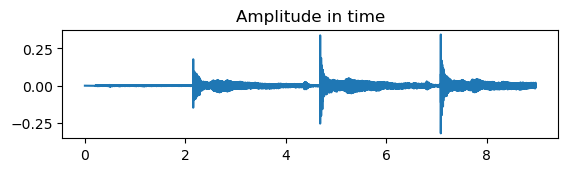

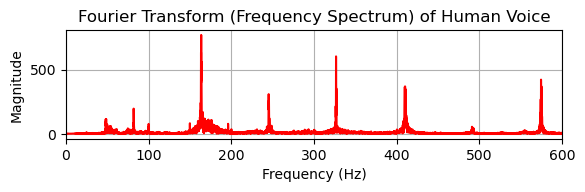

769.6915595382061
2.1888865308914376


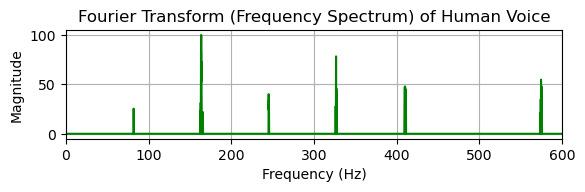

81.94774346793349
162.67072446555818
163.11609263657957
163.22743467933492
163.33877672209024
163.4501187648456
163.56146080760095
163.67280285035628
163.78414489311163
163.89548693586698
164.0068289786223
164.11817102137766
164.22951306413302
165.2315914489311
165.6769596199525
245.1751781472684
245.28652019002374
245.3978622327791
245.50920427553444
245.62054631828977
326.34352731591446
326.45486935866984
326.6775534441805
326.78889548693587
326.9002375296912
327.1229216152019
327.23426365795723
409.8500593824228
409.9614014251781
410.1840855106888
410.29542755344414
410.4067695961995
410.51811163895485
410.6294536817102
410.74079572446556
410.8521377672209
410.9634798099762
411.29750593824224
574.0795724465557
574.4135985748218
574.7476247030879
574.8589667458432
574.9703087885986
575.081650831354
575.1929928741092
575.3043349168646
575.5270190023753
575.6383610451306
575.749703087886
654.3571852731591
654.4685273159145
654.6912114014251
654.8025534441805
655.0252375296911
655.13657

In [ ]:
filename = "Phone/Ee.mp3"

print(soud_to_frequency(filename,20))
show_sonud(filename,20)

In [ ]:


import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def mymodel(filename,filter_persent = 20,n =1):
    # Load the human voice audio file

    y, sr = librosa.load(filename, sr=None)
    time = np.linspace(0,len(y)/sr ,len(y))

    # Compute Fourier Transform using FFT
    N = len(y)  # Number of samples
    frequencies = np.fft.rfftfreq(N, d=1/sr)  # Frequency bins
    fft_values = np.fft.rfft(y)  # Compute FFT
    magnitude = np.abs(fft_values)  # Magnitude spectrum

    print(frequencies)
    print(magnitude)

    plt.subplot(2,1,1)
    plt.plot(time,y)

    plt.title("Amplitude in time")
    plt.show()

    max_mag = max(magnitude)
    # print(max_mag)

    new_mag = magnitude/max_mag*100
    fileter_mag = new_mag.copy()
    fileter_mag[fileter_mag < filter_persent] = 0

    plt.subplot(2,1,2)
    plt.plot(frequencies, fileter_mag, color='g')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("after filter")
    plt.xlim(0, 600)  # Limit x-axis to 5 kHz (Human voice mostly < 5kHz)
    plt.grid()
    plt.show()
    ans = []
    for i in range(len(fileter_mag)):
        if fileter_mag[i] >= filter_persent:
            # print(frequencies[i])
            ans.append(int(frequencies[i]))
    ans = list(set(ans))
    ans.sort()
    return ans

[0.00000000e+00 1.11342043e-01 2.22684086e-01 ... 2.39997773e+04
 2.39998887e+04 2.40000000e+04]
[1.20678569e+01 1.34395933e+00 8.88079514e-01 ... 7.87470754e-04
 8.29298615e-04 9.23748455e-04]


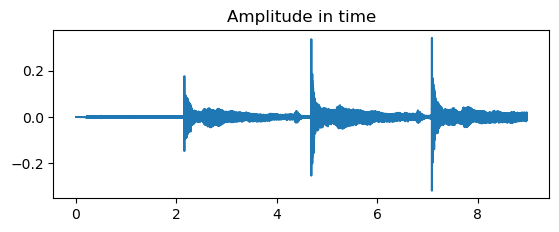

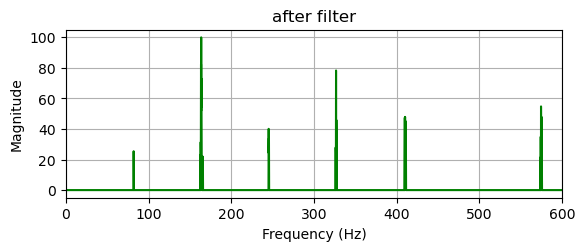

[81, 162, 163, 164, 165, 245, 326, 327, 409, 410, 411, 574, 575, 654, 655, 657, 658, 659, 660, 908, 909]
[0.00000000e+00 1.29132231e-01 2.58264463e-01 ... 2.39997417e+04
 2.39998709e+04 2.40000000e+04]
[9.46484325e+00 4.42260405e+00 5.72977241e+00 ... 8.38035641e-03
 8.38959786e-03 8.38240241e-03]


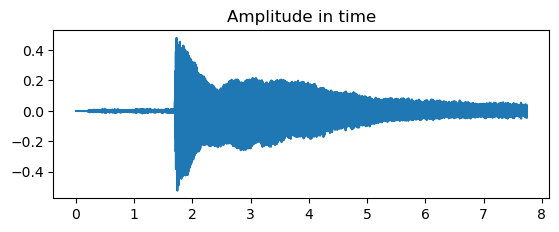

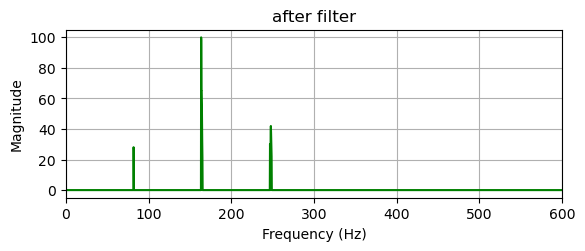

[81, 163, 164, 165, 246, 247, 248]


In [ ]:
print(mymodel("Phone/Ee.mp3"))
print(mymodel("Phone/stringE.mp3"))

[0.00000000e+00 1.07511468e-01 2.15022936e-01 ... 2.39997850e+04
 2.39998925e+04 2.40000000e+04]
[1.36608686e+01 1.70484202e-01 3.82101011e-01 ... 2.34348276e-03
 2.37655189e-03 2.29932126e-03]


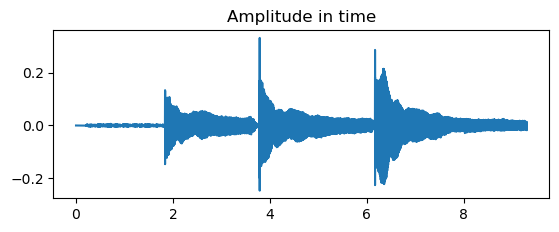

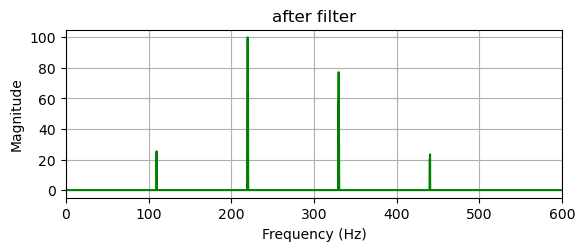

[109, 219, 220, 329, 330, 440, 659, 661, 772, 880, 881, 882, 883, 884, 885, 886]
[0.00000000e+00 1.21437824e-01 2.42875648e-01 ... 2.39997571e+04
 2.39998786e+04 2.40000000e+04]
[2.10494004e+00 1.14736817e+01 1.52206786e+01 ... 1.13819452e-02
 1.13813104e-02 1.13635157e-02]


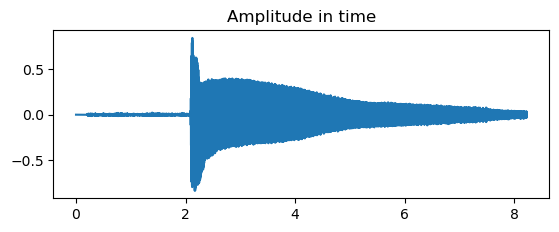

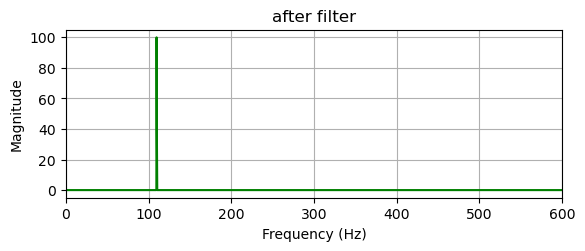

[109, 110]


In [ ]:
print(mymodel("Phone/Ae.mp3"))
print(mymodel("Phone/stringA.mp3"))

[0.00000000e+00 1.10294118e-01 2.20588235e-01 ... 2.39997794e+04
 2.39998897e+04 2.40000000e+04]
[1.30851537e+01 3.38511435e-01 3.80055782e-01 ... 5.01639505e-03
 4.97710919e-03 4.96565037e-03]


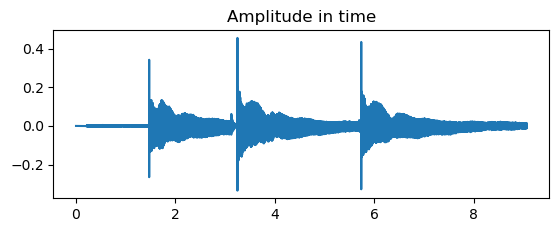

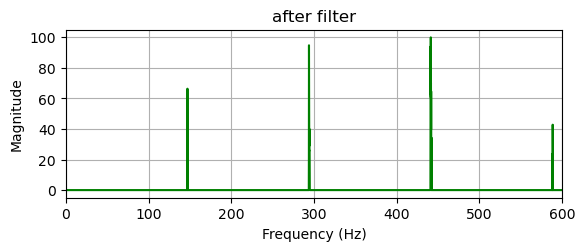

[147, 293, 294, 441, 442, 588, 883, 884, 885, 886]
[0.00000000e+00 1.55730897e-01 3.11461794e-01 ... 2.39996885e+04
 2.39998443e+04 2.40000000e+04]
[8.92471169 2.74762747 1.17397324 ... 0.01270908 0.01271595 0.01271883]


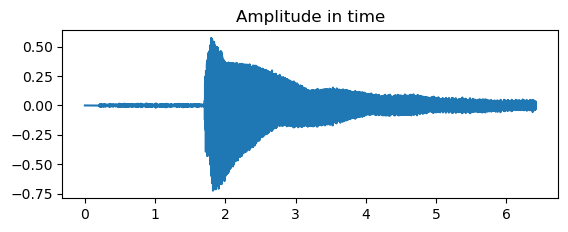

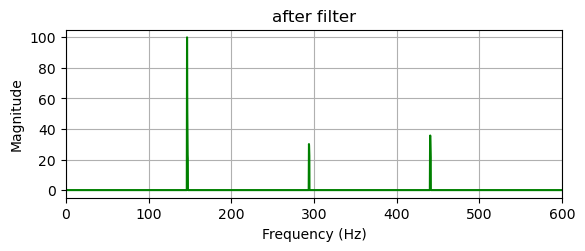

[146, 147, 293, 294, 440, 441]


In [ ]:
print(mymodel("Phone/De.mp3"))
print(mymodel("Phone/stringD.mp3"))

[0.00000000e+00 1.03476821e-01 2.06953642e-01 ... 2.39997930e+04
 2.39998965e+04 2.40000000e+04]
[1.35853286e+01 5.25635516e-01 8.32750869e-01 ... 5.47802504e-03
 5.50330989e-03 5.48859562e-03]


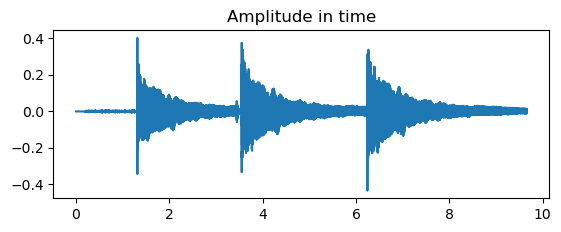

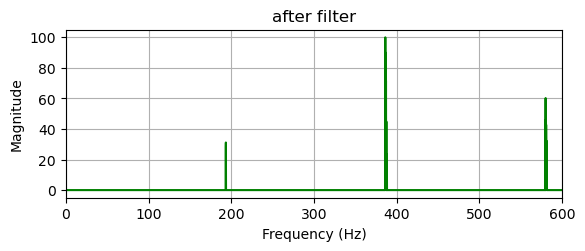

[193, 386, 387, 388, 579, 580, 581, 1356, 1357, 1358, 1359, 1944, 1945, 2138, 2139, 2140, 2141, 2142, 2143]
[0.00000000e+00 1.38274336e-01 2.76548673e-01 ... 2.39997235e+04
 2.39998617e+04 2.40000000e+04]
[5.79648135e-01 1.15352636e+01 1.12913834e+01 ... 1.08979299e-03
 1.07971266e-03 1.09578939e-03]


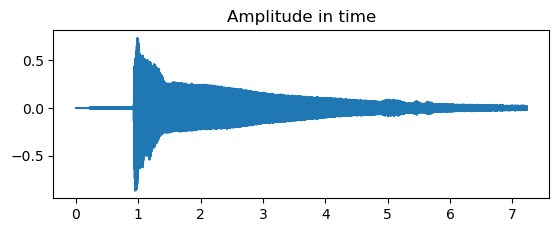

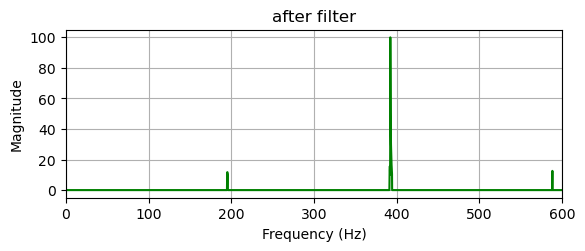

[194, 195, 391, 392, 393, 394, 588]


In [ ]:
print(mymodel("Phone/Ge.mp3"))
print(mymodel("Phone/stringG.mp3",10))

[0.00000000e+00 8.77808989e-02 1.75561798e-01 ... 2.39998244e+04
 2.39999122e+04 2.40000000e+04]
[1.67083273e+01 6.42470711e-01 6.87060194e-01 ... 1.40823743e-04
 5.57370982e-05 5.44947314e-05]


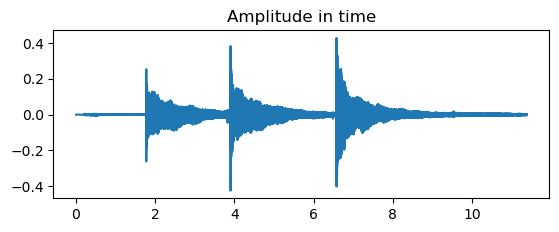

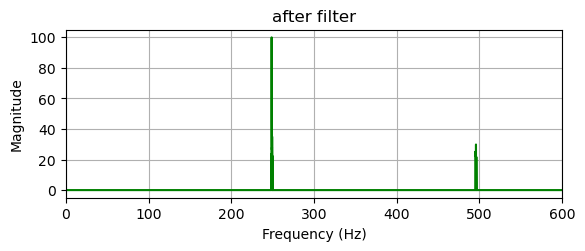

[248, 249, 495, 496, 744, 745, 992, 993, 1489, 1490, 1491, 1986, 1987, 1988, 1989, 2238, 2239, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3736, 3737, 3738]
[0.00000000e+00 1.74906716e-01 3.49813433e-01 ... 2.39996502e+04
 2.39998251e+04 2.40000000e+04]
[9.52836369e+00 1.30734645e+00 1.65167074e+00 ... 2.74236106e-03
 2.72196769e-03 2.72678942e-03]


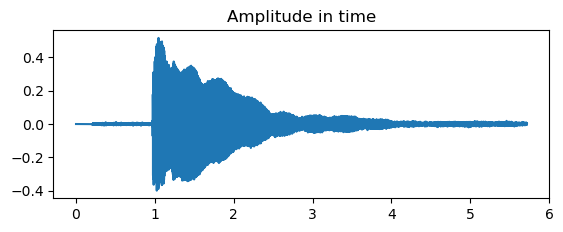

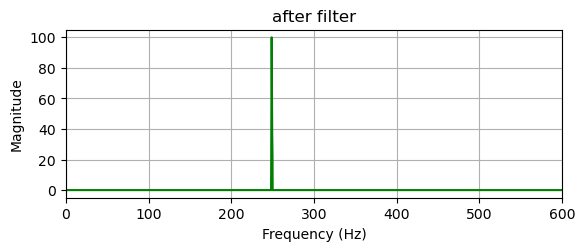

[248, 249]


In [ ]:
print(mymodel("Phone/Be.mp3"))
print(mymodel("Phone/stringB.mp3"))

[0.00000000e+00 1.13774272e-01 2.27548544e-01 ... 2.39997725e+04
 2.39998862e+04 2.40000000e+04]
[1.27452950e+01 6.82902841e-01 5.26813330e-01 ... 2.88004619e-04
 2.37491074e-04 3.20622075e-04]


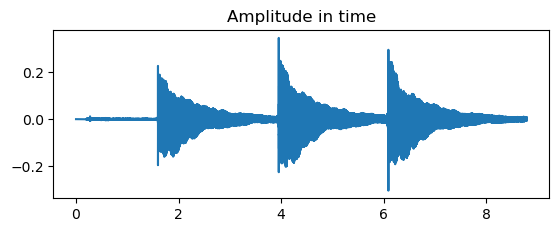

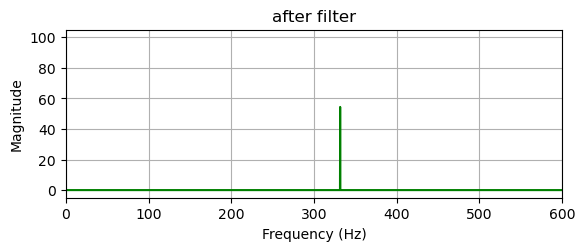

[331, 661, 662, 663]
[0.00000000e+00 1.33928571e-01 2.67857143e-01 ... 2.39997321e+04
 2.39998661e+04 2.40000000e+04]
[1.04682321e+01 1.94499122e-01 5.53086189e-01 ... 2.16122644e-03
 2.15639207e-03 2.15920895e-03]


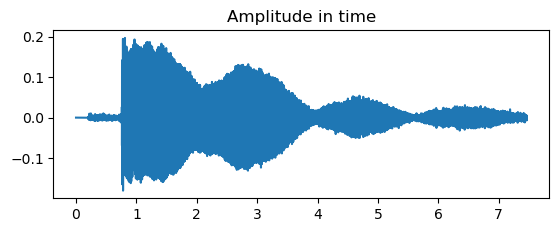

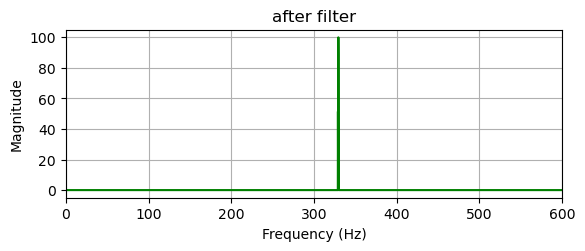

[329, 330]


In [ ]:
print(mymodel("Phone/E2e.mp3"))
print(mymodel("Phone/stringE2.mp3"))

[0.00000000e+00 1.55179512e-01 3.10359024e-01 ... 2.20496121e+04
 2.20497672e+04 2.20499224e+04]
[4.70919818e+01 7.87406430e+01 8.90522232e+01 ... 4.01776050e-03
 4.12827602e-03 4.32026991e-03]


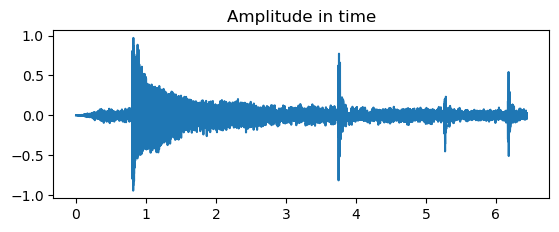

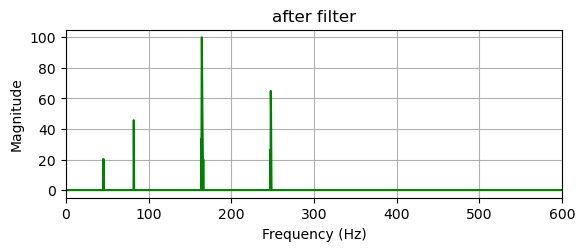

[45, 81, 82, 163, 164, 165, 166, 247, 248, 1407]


In [ ]:
print(mymodel(""))
# print(mymodel("Phone/stringA.mp3"))

In [ ]:
# print(mymodel("Esting.mp3",10))

C:\Users\thain\AppData\Local\Temp\ipykernel_25780\333953203.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=None)
c:\Users\thain\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'Esting.mp3'